In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score


In [17]:
ls

 Volume in drive C is Windows
 Volume Serial Number is B424-2B37

 Directory of C:\Users\HP

27-09-2022  21:53    <DIR>          .
28-05-2022  05:56    <DIR>          ..
31-05-2022  03:22    <DIR>          .anaconda
16-08-2022  10:13    <DIR>          .conda
28-05-2022  19:44                25 .condarc
28-05-2022  19:44    <DIR>          .continuum
27-09-2022  21:43    <DIR>          .ipynb_checkpoints
28-05-2022  19:44    <DIR>          .ipython
03-06-2022  18:35    <DIR>          .jupyter
28-05-2022  19:44    <DIR>          .matplotlib
28-05-2022  19:44    <DIR>          .spyder-py3
25-09-2022  13:44             1,886 ;Question 11.ipynb
07-09-2022  14:25             7,347 1.ipynb
12-09-2022  07:36               589 12-09-22.ipynb
13-09-2022  09:25             6,666 13-09-22.ipynb
14-09-2022  08:27             4,115 14-09-22.ipynb
19-09-2022  08:44             2,613 19-09-22.ipynb
20-09-2022  09:18             4,499 20-09-22.ipynb
26-08-2022  08:44             2,177 26-08-22.ipynb
07-

In [19]:
wcat=pd.read_csv("C:\\Users\\HP\\Downloads\\WC_AT.csv")

In [20]:
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [21]:
wcat.shape

(109, 2)

In [22]:
wcat.head(10)

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
5,71.85,21.68
6,80.90,29.08
7,83.40,32.98
8,63.50,11.44
9,73.20,32.22


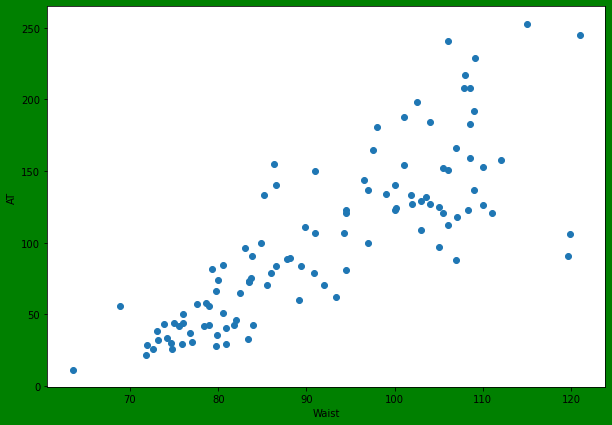

In [24]:
plt.figure(figsize=(10,7),facecolor="green")
plt.scatter(wcat.Waist,wcat.AT)
plt.xlabel("Waist")
plt.ylabel("AT")
plt.show()

In [25]:
wcat.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [26]:
first_model= smf.ols("AT~Waist",data=wcat).fit()

In [27]:
first_model

In [28]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           1.62e-27
Time:                        22:04:43   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
first_model.resid

0     -16.848252
1      -9.241704
2     -24.353210
3     -31.589758
4     -12.382366
         ...    
104    -6.250337
105   -44.530093
106    -3.130398
107    50.770560
108    48.695244
Length: 109, dtype: float64

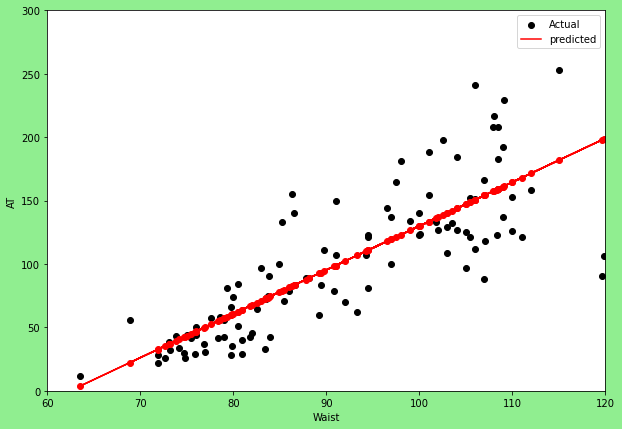

In [32]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(wcat.Waist,wcat.AT,color="black",label="Actual")
plt.plot(wcat.Waist,first_model.predict(),label="predicted",color="red",linestyle="-")
plt.scatter(wcat.Waist,first_model.predict(),color="red")
plt.xlabel("Waist")
plt.ylabel("AT")
plt.xlim(60,120)
plt.ylim(0,+300)
plt.legend(loc="best")
plt.show()

In [43]:
wcat["Waist_Sq"]=wcat.Waist**2
model_quad=smf.ols("np.log(AT)~Waist+Waist_Sq",data=wcat).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           1.80e-35
Time:                        22:35:26   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist          0.2289      0.032      7.107      0.000       0.165       0.293
Waist_Sq      -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""